# CSE 4038 - Computer Vision in Health Care Lab

### Name: V Padmaja
### RegNo: 19BAI1107
## Lab Experiment 4: Foreground Extraction, Background Subtraction

### Mounting the drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importing Necessary Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.color import gray2rgb
import skimage.io
from google.colab.patches import cv2_imshow

## Original Image

### Reading and Displaying the Image

In [3]:
image = cv2.imread('/content/gdrive/MyDrive/IDRiD_13.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

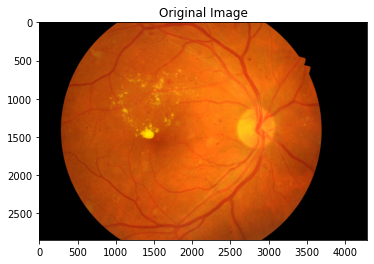

In [4]:
plt.title("Original Image")
plt.imshow(image)

# Foreground Extraction
#### This iris in the above image is mildly affected with diabetic retinopathy

## i) Grabcut Algorithm

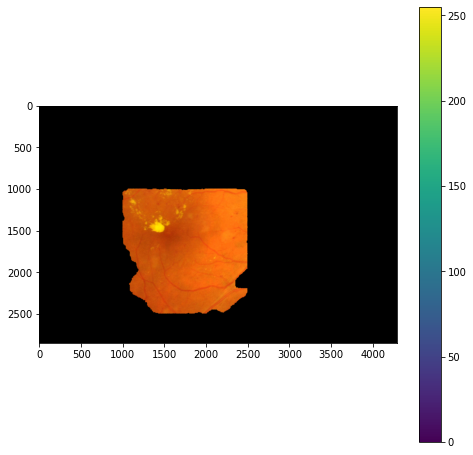

In [5]:
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (1000,1000,1500,1500)  # setting the coordinates for the purple region
cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)  # Applying Grabcut
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = image*mask2[:,:,np.newaxis]
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.colorbar()
plt.show()

### Inference: The grabcut algorithm has detected the affected part but there is also some unnecessary background. Some of the other affected affected areas which are small in size are left undetected.

## ii) Contour Detection Algorithm

### Converting to grayscale image

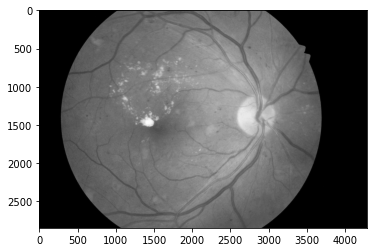

In [6]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

###  Apply binary thresholding

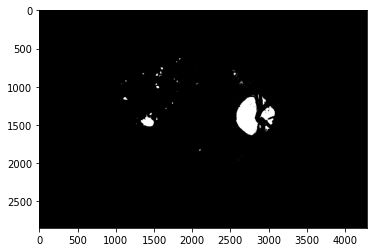

In [7]:
ret, thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.imshow(thresh, cmap = 'gray')

### Detecting the contours on the binary image 

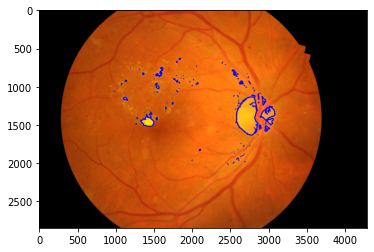

In [8]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = cv2.imread('/content/gdrive/MyDrive/IDRiD_13.jpg')
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=12, lineType=cv2.LINE_AA)
               
# see the results
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Contour Detection for RGB chennels separately 

(-0.5, 4287.5, 2847.5, -0.5)

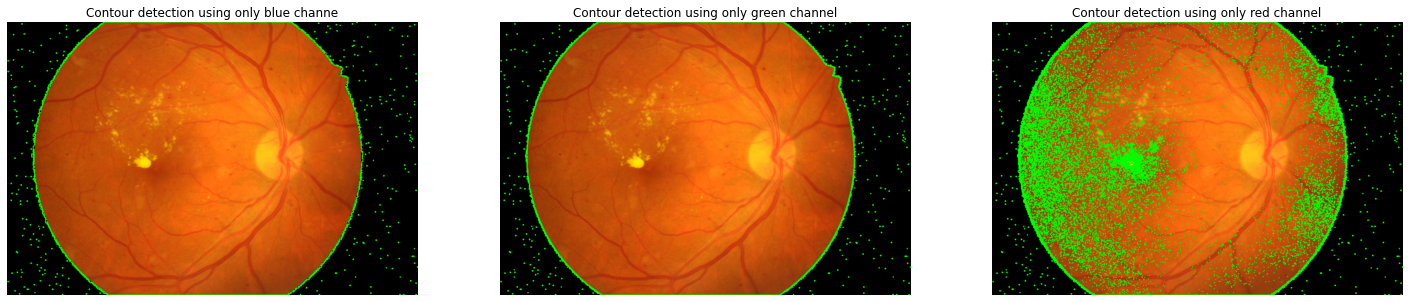

In [9]:
blue, green, red = cv2.split(image)

# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_blue = image.copy()
cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=8, lineType=cv2.LINE_AA)

# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_contour_green = image.copy()
cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=8, lineType=cv2.LINE_AA)

# detect contours using red channel and without thresholding
contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_contour_red = image.copy()
cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=8, lineType=cv2.LINE_AA)

plt.figure(figsize=(25,25))
plt.subplot(1,3,1)
plt.imshow(image_contour_blue)
plt.title("Contour detection using only blue channe")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(image_contour_green)
plt.title("Contour detection using only green channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(image_contour_red)
plt.title("Contour detection using only red channel")
plt.axis("off")

### Inference: The contour detection algorithm seems to perform better in Foregroung Extraction as it is able to detect even small regions of affected areas

# Background Subtraction
#### Background subtraction is carried out using 3 algorithms
 - BackgroundSubtractorMOG
 - BackgroundSubtractorMOG2
 - BackgroundSubtractorGMG

In [10]:
# creating object
fgbg1 = cv2.bgsegm.createBackgroundSubtractorMOG()
fgbg2 = cv2.createBackgroundSubtractorMOG2()
fgbg3 = cv2.bgsegm.createBackgroundSubtractorGMG()

# apply mask for background subtraction
fgmask1 = fgbg1.apply(img_gray);
fgmask2 = fgbg2.apply(img_gray);
fgmask3 = fgbg3.apply(img_gray);

### Visualizing Results

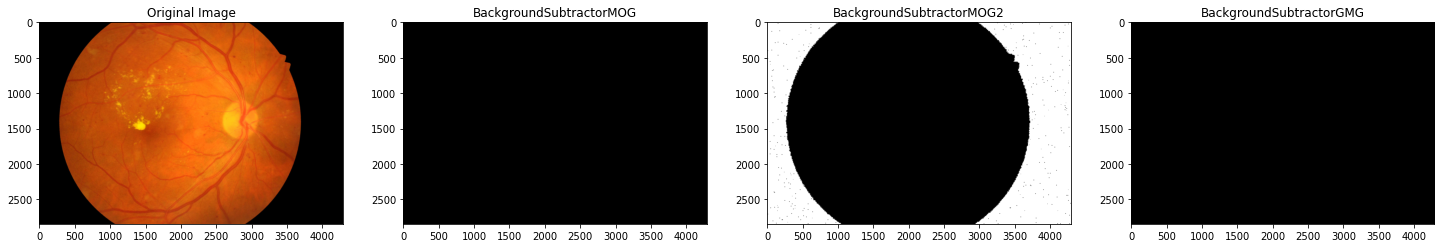

In [11]:
# Plotting all the images in subplots
plt.figure(figsize=(25,25))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title("Original Image")


plt.subplot(1,4,2)
plt.imshow(fgmask1, cmap="gray")
plt.title("BackgroundSubtractorMOG")


plt.subplot(1,4,3)
plt.imshow(fgmask2, cmap="gray")
plt.title("BackgroundSubtractorMOG2")


plt.subplot(1,4,4)
plt.imshow(fgmask3, cmap="gray")
plt.title("BackgroundSubtractorGMG")


plt.show()


### Inference: From the above results it we can clearly see that that BackgroundSubtractorMOG2 has performed better than BackgroundSubtractorMOG and BackgroundSubtractorGMG.

### The other algorithms do not seem to work well with this image

### Hence BackgroundSubtractorMOG2  it the best suited algorithm for the IDRiD dataset images.